In [50]:
pip install numpy==1.26.4

In [51]:
pip install matplotlib==3.9.0

In [52]:
pip install scikit-learn==1.5.0

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv("/content/insurance.csv")

In [55]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
562,27,male,30.50,0,no,southwest,2494.0220
1212,18,male,21.47,0,no,northeast,1702.4553
83,48,female,41.23,4,no,northwest,11033.6617
1219,38,female,30.21,3,no,northwest,7537.1639
871,26,female,29.48,1,no,southeast,3392.3652


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [57]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<ipython-input-59-767528c62eef>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


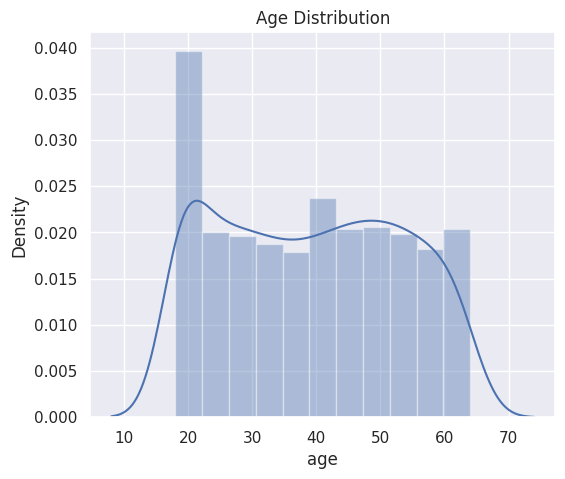

In [59]:
sns.set()
plt.figure(figsize=(6,5))
sns.distplot(df["age"])
plt.title("Age Distribution")
plt.show()

<ipython-input-60-5b7f2ebaa845>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


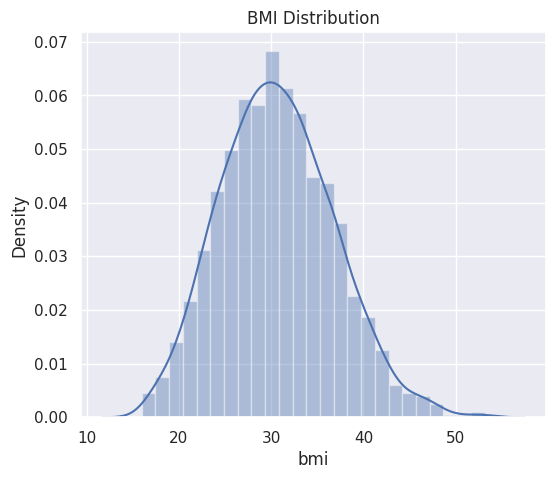

In [60]:
sns.set()
plt.figure(figsize=(6,5))
sns.distplot(df["bmi"])
plt.title("BMI Distribution")
plt.show()

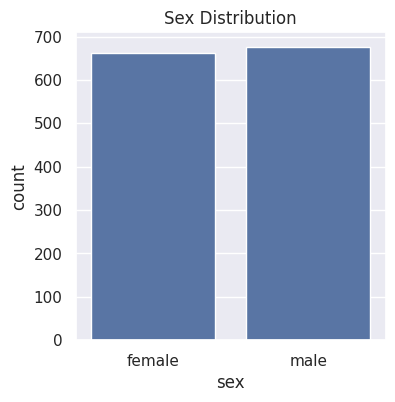

In [61]:
plt.figure(figsize=(4,4))
sns.countplot(x="sex", data=df)
plt.title("Sex Distribution")
plt.show()


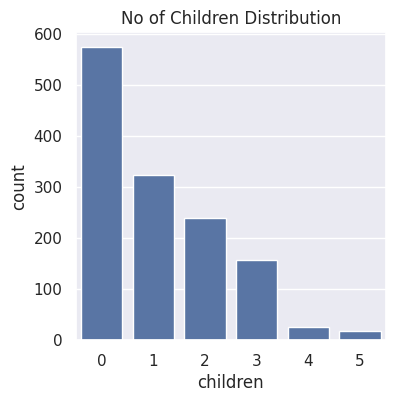

In [62]:
plt.figure(figsize=(4,4))
sns.countplot(x="children", data=df)
plt.title("No of Children Distribution")
plt.show()

In [63]:
df["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [64]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


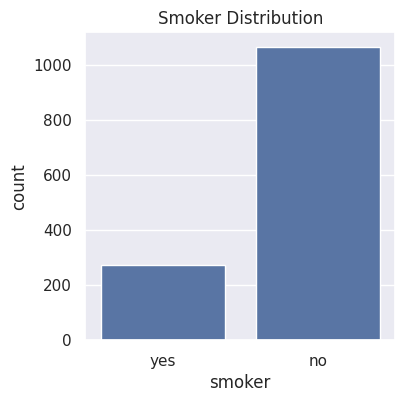

In [65]:
plt.figure(figsize=(4,4))
sns.countplot(x="smoker", data=df)
plt.title("Smoker Distribution")
plt.show()

In [66]:
df["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


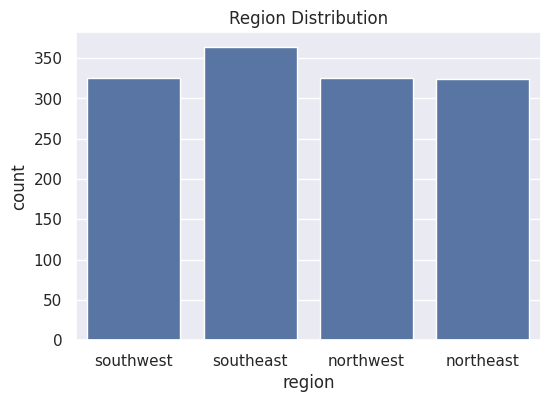

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(x="region", data=df)
plt.title("Region Distribution")
plt.show()

In [68]:
df["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-69-3686f2c2ce9f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


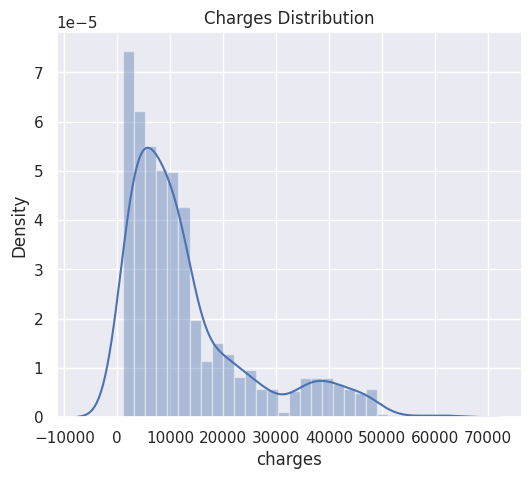

In [69]:
plt.figure(figsize=(6,5))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [70]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


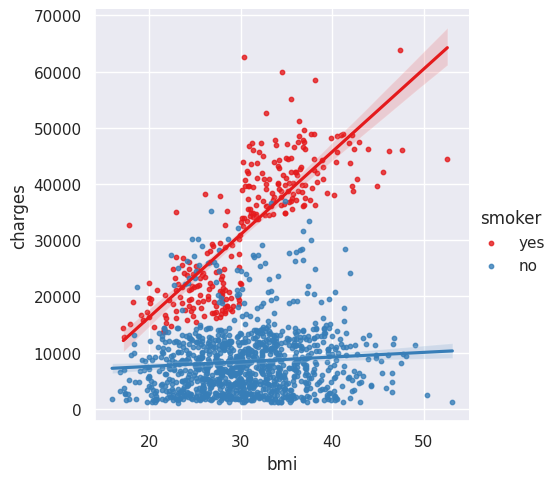

In [71]:
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='Set1', scatter_kws={"s":10})
plt.show()

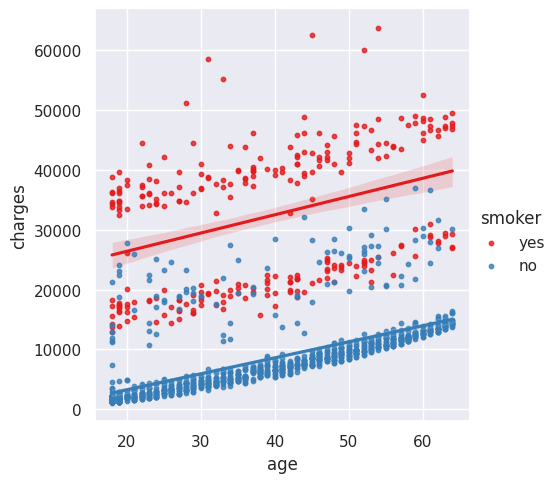

In [72]:
sns.lmplot(x='age',y='charges', data=df, hue='smoker', palette='Set1', scatter_kws={'s':10})
plt.show()

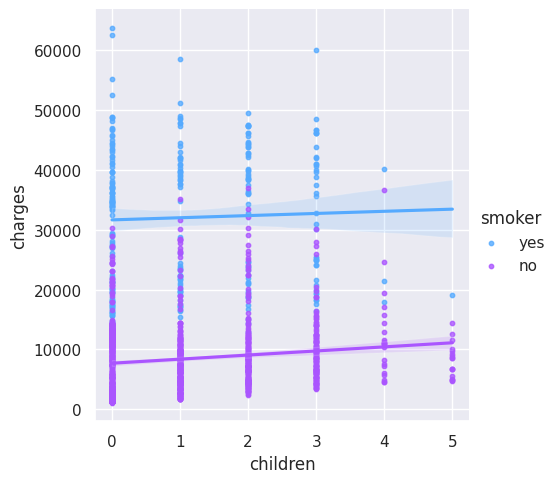

In [73]:
sns.lmplot(x='children',y='charges', data=df, hue='smoker', palette='cool', scatter_kws={'s':10})
plt.show()

<ipython-input-74-c75743c012dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=df, palette='Blues', order=plot_order)


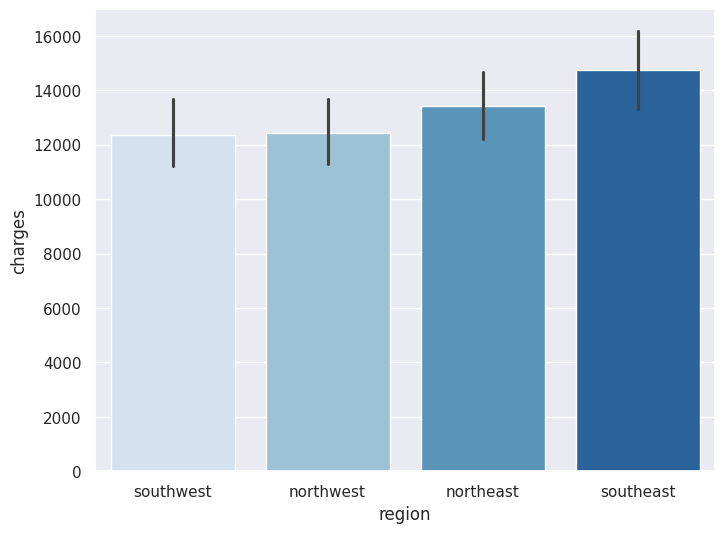

In [74]:
f, axs = plt.subplots(1,1, figsize=(8,6))
plot_order = df.groupby('region')['charges'].sum().sort_values(ascending=True).index.values
sns.barplot(x='region', y='charges', data=df, palette='Blues', order=plot_order)
plt.show()

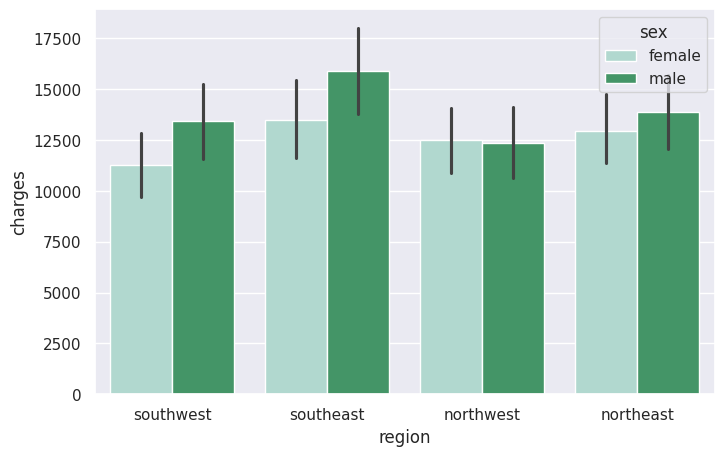

In [75]:
f, axs = plt.subplots(1,1, figsize=(8,5))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='BuGn')
plt.show()

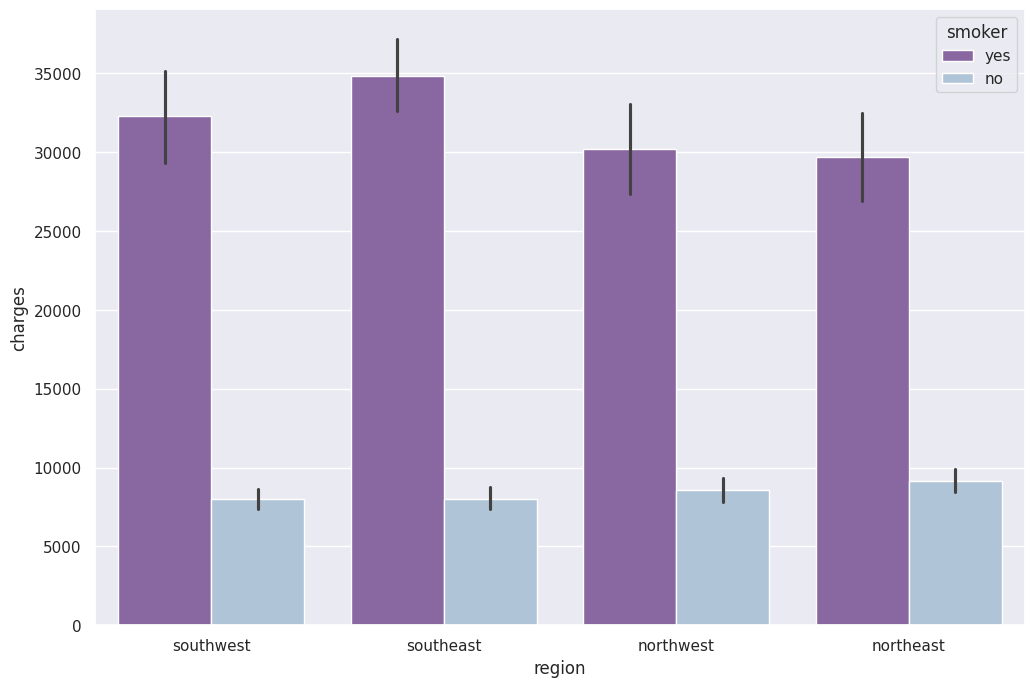

In [76]:
f, axs = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='BuPu_r')
plt.show()

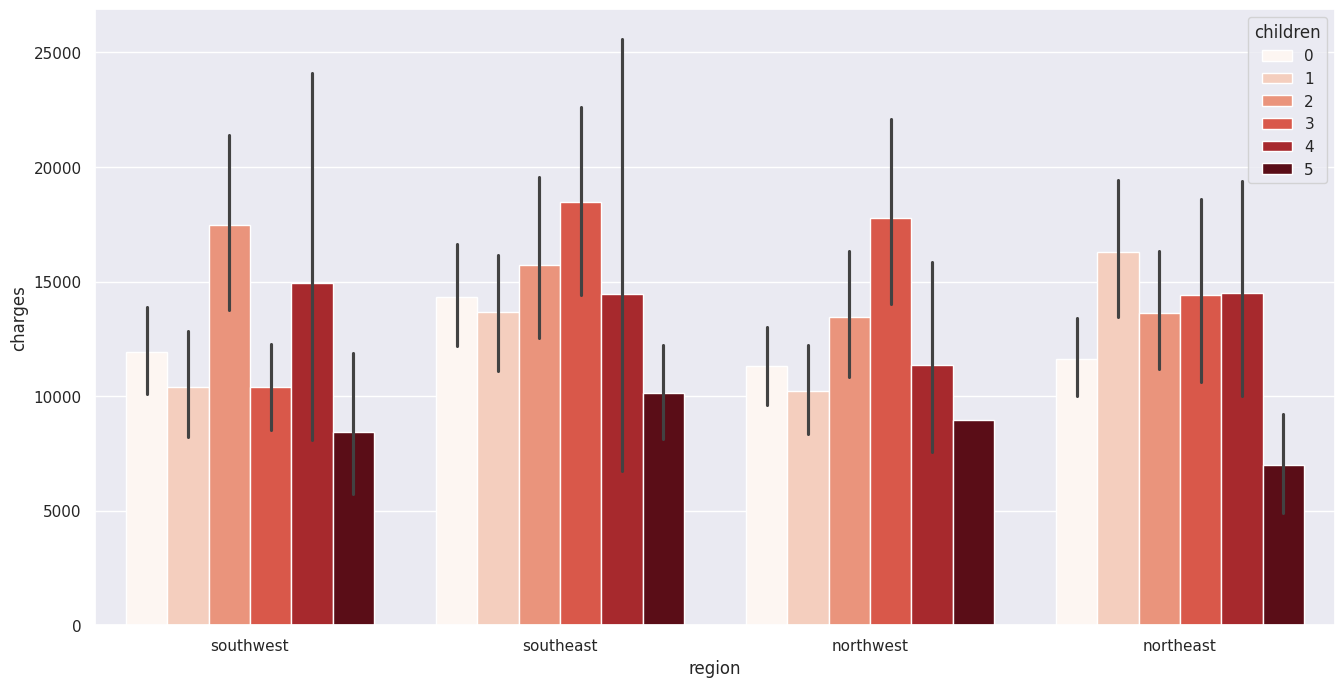

In [77]:
f, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Reds')
plt.show()

In [78]:
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)
df.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)
df.replace({'region':{'northeast':0, 'southwest':1, 'northeast':2, 'southeast':3}}, inplace=True)

In [79]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1294,58,0,25.175,0,0,0,11931.12525
621,37,0,34.100,4,1,1,40182.24600
339,46,1,27.720,1,0,3,8232.63880
787,21,0,36.860,0,0,2,1917.31840
1190,31,1,32.775,2,0,2,5327.40025


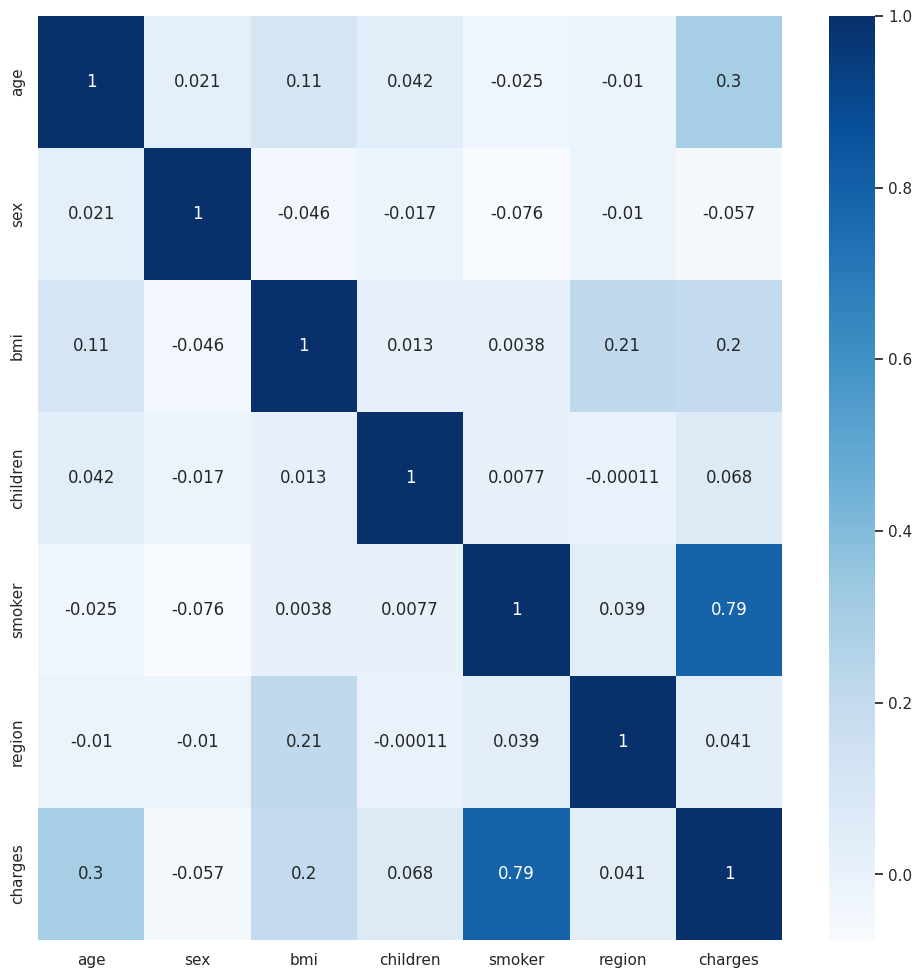

In [80]:
f, axs = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [81]:
df['region'].unique()

array([1, 3, 2, 0])

In [108]:
X = np.array(df.drop(['charges'],axis=1))
y = np.array(df['charges'])

In [109]:
X

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  1.  ],
       [18.  ,  0.  , 33.77,  1.  ,  0.  ,  3.  ],
       [28.  ,  0.  , 33.  ,  3.  ,  0.  ,  3.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  0.  ,  3.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  0.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  2.  ]])

In [110]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [130]:
X.shape, y.shape

((1338, 6), (1338,))

In [131]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [132]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 6), (1070, 1), (268, 6), (268, 1))

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [135]:
Y_pred_lr = lr.predict(X_test)

In [136]:
accuracy = lr.score(X_test, y_test)
print('Accuracy : ',accuracy)

Accuracy :  0.7986800627985717


In [137]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=0.5)
r.fit(X_train, y_train)

Ridge(alpha=0.5)

In [138]:
ridge_accuracy = r.score(X_test, y_test)
print('Accuracy = ', ridge_accuracy)

Accuracy =  0.7985159660407235


In [139]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor as rfr
rf_reg = rfr(n_estimators = 10,random_state = 0)

rf_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [140]:
accuracy = rf_reg.score(X_test, y_test)
print(f'Accuracy : {accuracy:.3}')

Accuracy : 0.867


In [142]:
import pickle
fname = 'model.pkl'
pickle.dump(rf_reg, open(fname, 'wb'))